In [1]:
# Cell 1: Install imbalanced-learn (for SMOTE, ADASYN etc.)
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\sharm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Cell 1: Import necessary libraries & set display options

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# For balancing later
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Show more columns while exploring
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

# Path to datasets folder
DATASET_PATH = "datasets"

# List all CSV files (sorted by date)
csv_files = sorted(glob.glob(os.path.join(DATASET_PATH, "*.csv")))

print("Found", len(csv_files), "files")
print(csv_files[:5])  # preview first 5 files


Found 9 files
['datasets\\02-14-2018.csv', 'datasets\\02-15-2018.csv', 'datasets\\02-16-2018.csv', 'datasets\\02-21-2018.csv', 'datasets\\02-22-2018.csv']


In [3]:
# Cell 2: Load a sample CSV to explore structure and memory usage

sample_file = csv_files[0]  # pick the first file
print("Loading sample file:", sample_file)

# Load with low_memory and no dtype guessing issues
df_sample = pd.read_csv(sample_file, low_memory=False)

print("Shape:", df_sample.shape)
print("\nColumns:", df_sample.columns.tolist())
print("\nData Types:\n", df_sample.dtypes)
print("\nMemory Usage (MB):", round(df_sample.memory_usage(deep=True).sum() / 1024**2, 2))

# Preview top rows
df_sample.head()


Loading sample file: datasets\02-14-2018.csv
Shape: (1048575, 80)

Columns: ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Se

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,139.300036,56320958,56320761,112641719,5.632086e+07,139.300036,56320958,56320761,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,114.551299,56320814,56320652,112641466,5.632073e+07,114.551299,56320814,56320652,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,301.934596,56319525,56319098,112638623,5.631931e+07,301.934596,56319525,56319098,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,247443.778966,673900,22,6453966,4.609976e+05,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,511356.609733,1928102,21,8804066,6.772358e+05,532416.970959,1928102,246924,7715481,771548.100000,755543.082717,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [4]:
# Cell 3: Efficient loading of all CSVs with dtype optimization

def optimize_dtypes(df):
    """
    Downcast numerical columns to save memory.
    """
    for col in df.select_dtypes(include=["int64"]).columns:
        df[col] = pd.to_numeric(df[col], downcast="integer")
    for col in df.select_dtypes(include=["float64"]).columns:
        df[col] = pd.to_numeric(df[col], downcast="float")
    return df

# Load and optimize all datasets
all_data = []
for file in csv_files:
    print(f"Loading {file} ...")
    chunk = pd.read_csv(file, low_memory=False)
    chunk = optimize_dtypes(chunk)
    all_data.append(chunk)

# Concatenate into one DataFrame
df = pd.concat(all_data, ignore_index=True)

print("\nFinal Shape:", df.shape)
print("Memory Usage (MB):", round(df.memory_usage(deep=True).sum() / 1024**2, 2))
df.head()


Loading datasets\02-14-2018.csv ...
Loading datasets\02-15-2018.csv ...
Loading datasets\02-16-2018.csv ...
Loading datasets\02-21-2018.csv ...
Loading datasets\02-22-2018.csv ...
Loading datasets\02-23-2018.csv ...
Loading datasets\02-28-2018.csv ...
Loading datasets\03-01-2018.csv ...
Loading datasets\03-02-2018.csv ...

Final Shape: (8284254, 80)
Memory Usage (MB): 26198.08


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320859.5,139.300036,56320958,56320761,112641719,56320859.5,139.300036,56320958,56320761,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320733.0,114.551299,56320814,56320652,112641466,56320733.0,114.551299,56320814,56320652,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026634,56319311.5,301.934596,56319525,56319098,112638623,56319311.5,301.934596,56319525,56319098,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026634,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.599998,196.741241,976,0,227.300003,371.677887,544.161528,3.873587,268915.25,247443.778966,673900,22,6453966,460997.571429,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.07692,277.834747,77192.153846,0,0,0,1,0,0,0,0,0,140.479996,82.599998,227.300003,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.64286,203.745544,976,0,200.818176,362.249878,380.733175,2.839597,366836.083333,511356.609733,1928102,21,8804066,677235.846154,532416.970959,1928102,246924,7715481,771548.1,755543.082717,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.92308,279.763031,78267.353846,0,0,0,1,0,0,0,0,0,134.080002,81.64286,200.818176,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [5]:
# Cell 4: Basic preprocessing (NaN handling, Timestamp parsing, Label encoding)

# 1. Check missing values
missing_summary = df.isnull().sum()
print("Missing values per column (top 10):\n", missing_summary.sort_values(ascending=False).head(10))

# 2. Parse Timestamp to datetime + extract time-based features
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df["Second"] = df["Timestamp"].dt.second

# 3. Encode Label (Normal vs Attack types etc.)
df["Label"] = df["Label"].astype("category")
df["Label_Code"] = df["Label"].cat.codes

print("\nUnique Labels:", df["Label"].unique())
print("Label Mapping:", dict(enumerate(df["Label"].cat.categories)))

# 4. Final memory check
print("\nMemory Usage (MB):", round(df.memory_usage(deep=True).sum() / 1024**2, 2))

# Preview after preprocessing
df.head()


Missing values per column (top 10):
 Flow Byts/s        22954
Dst Port               0
Timestamp              0
Protocol               0
Tot Fwd Pkts           0
Tot Bwd Pkts           0
TotLen Fwd Pkts        0
Flow Duration          0
Fwd Pkt Len Max        0
Fwd Pkt Len Min        0
dtype: int64

Unique Labels: ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', ..., 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Infilteration', 'Bot']
Length: 15
Categories (15, object): ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', ..., 'Infilteration', 'Label', 'SQL Injection', 'SSH-Bruteforce']
Label Mapping: {0: 'Benign', 1: 'Bot', 2: 'Brute Force -Web', 3: 'Brute Force -XSS', 4: 'DDOS attack-HOIC', 5: 'DDOS attack-LOIC-UDP', 6: 'DoS attacks-GoldenEye', 7: 'DoS attacks-Hulk', 8: 'DoS attacks-SlowHTTPTest', 9: 'DoS attacks-Slowloris', 10: 'FTP-BruteForce', 11: 'Infilteration', 12: 'Label', 13: 'SQL Injection', 14: 'SSH-Bruteforce

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second,Label_Code
0,0,0,2018-02-14 08:31:01,112641719,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320859.5,139.300036,56320958,56320761,112641719,56320859.5,139.300036,56320958,56320761,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,2018.0,2.0,14.0,8.0,31.0,1.0,0
1,0,0,2018-02-14 08:33:50,112641466,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320733.0,114.551299,56320814,56320652,112641466,56320733.0,114.551299,56320814,56320652,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,2018.0,2.0,14.0,8.0,33.0,50.0,0
2,0,0,2018-02-14 08:36:39,112638623,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026634,56319311.5,301.934596,56319525,56319098,112638623,56319311.5,301.934596,56319525,56319098,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026634,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,2018.0,2.0,14.0,8.0,36.0,39.0,0
3,22,6,2018-02-14 08:40:13,6453966,15,10,1239,2273,744,0,82.599998,196.741241,976,0,227.300003,371.677887,544.161528,3.873587,268915.25,247443.778966,673900,22,6453966,460997.571429,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.07692,277.834747,77192.153846,0,0,0,1,0,0,0,0,0,140.479996,82.599998,227.300003,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign,2018.0,2.0,14.0,8.0,40.0,13.0,0
4,22,6,2018-02-14 08:40:23,8804066,14,11,1143,2209,744,0,81.64286,203.745544,976,0,200.818176,362.249878,380.733175,2.839597,366836.083333,511356.609733,1928102,21,8804066,677235.846154,532416.970959,1928102,246924,7715481,771548.1,755543.082717,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.92308,279.763031,78267.353846,0,0,0,1,0,0,0,0,0,134.080002,81.64286,200.818176,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign,2018.0,2.0,14.0,8.0,40.0,23.0,0


In [6]:
# Cell 5 (Fix): Ensure numeric columns before feature engineering

# List of columns we need for interaction features
num_cols = ["Tot Fwd Pkts", "Tot Bwd Pkts", "TotLen Fwd Pkts", "TotLen Bwd Pkts", 
            "Flow Duration", "Flow Byts/s"]

# Convert to numeric (force errors to NaN, then fill with 0)
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# 1. Fill missing values (already handled but double-check Flow Byts/s)
df["Flow Byts/s"].fillna(0, inplace=True)

# 2. Interaction Features (ratios and differences)
df["Pkt_Ratio_Fwd_Bwd"] = (df["Tot Fwd Pkts"] + 1) / (df["Tot Bwd Pkts"] + 1)
df["Len_Ratio_Fwd_Bwd"] = (df["TotLen Fwd Pkts"] + 1) / (df["TotLen Bwd Pkts"] + 1)

df["Pkt_Diff_Fwd_Bwd"] = df["Tot Fwd Pkts"] - df["Tot Bwd Pkts"]
df["Len_Diff_Fwd_Bwd"] = df["TotLen Fwd Pkts"] - df["TotLen Bwd Pkts"]

# 3. Rolling Features (group by Hour to capture traffic bursts)
df = df.sort_values("Timestamp")

df["Fwd_Pkts_RollMean"] = df.groupby("Hour")["Tot Fwd Pkts"].transform(lambda x: x.rolling(1000, min_periods=1).mean())
df["Bwd_Pkts_RollMean"] = df.groupby("Hour")["Tot Bwd Pkts"].transform(lambda x: x.rolling(1000, min_periods=1).mean())
df["Flow_Duration_RollStd"] = df.groupby("Hour")["Flow Duration"].transform(lambda x: x.rolling(1000, min_periods=1).std())

print("✅ Feature engineering successful. New columns added.")
df.head()


✅ Feature engineering successful. New columns added.


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second,Label_Code,Pkt_Ratio_Fwd_Bwd,Len_Ratio_Fwd_Bwd,Pkt_Diff_Fwd_Bwd,Len_Diff_Fwd_Bwd,Fwd_Pkts_RollMean,Bwd_Pkts_RollMean,Flow_Duration_RollStd
410956,0,0,1970-01-05 03:01:17,-1.187300e+10,2.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,-0.000168,-11873000000.0,0.0,-11873000000,-11873000000,-11873000000,-11873000000.0,0.0,-11873000000,-11873000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,0.0,0.0,0,0,Benign,1970.0,1.0,5.0,3.0,1.0,17.0,0,3.0,1.0,2.0,0.0,2.000000,0.0,NaN
410957,0,0,1970-01-08 07:32:33,-6.814020e+11,3.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,-0.000004,-340701000000.0,256344592956.43399,-159438000000,-521964000000,-681402000000,-340701000000.0,256344592956.43399,-159438000000,-521964000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,0.0,0.0,0,0,Benign,1970.0,1.0,8.0,7.0,32.0,33.0,0,4.0,1.0,3.0,0.0,3.000000,0.0,NaN
4440733,0,0,1970-01-10 03:04:26,-1.885050e+11,9.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,-0.000048,-23563125000.0,279482181562.075012,324807000000,-449709000000,-188505000000,-23563125000.0,279482181562.075012,324807000000,-449709000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,9,0,0,0,-1,-1,0,0,0.0,0.0,0,0,197474750000.0,141251680160.803986,324807000000,21756000000,Benign,1970.0,1.0,10.0,3.0,4.0,26.0,0,10.0,1.0,9.0,0.0,5.500000,0.0,1.248977e+11
4440736,0,0,1970-01-11 03:51:32,-8.282200e+11,2.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,-0.000002,-828220000000.0,0.0,-828220000000,-828220000000,-828220000000,-828220000000.0,0.0,-828220000000,-828220000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,0.0,0.0,0,0,Benign,1970.0,1.0,11.0,3.0,51.0,32.0,0,3.0,1.0,2.0,0.0,4.333333,0.0,4.295068e+11
4440735,0,0,1970-01-11 05:12:30,-4.834000e+09,43.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,-0.008895,-115095238.09524,445870232660.05603,846458000000,-935931000000,-4834000000,-115095238.09524,445870232660.05603,846458000000,-935931000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,43,0,0,0,-1,-1,0,0,0.0,0.0,0,0,375976047619.047974,262247866338.598999,846458000000,21291000000,Benign,1970.0,1.0,11.0,5.0,12.0,30.0,0,44.0,1.0,43.0,0.0,43.000000,0.0,NaN


In [10]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Drop non-numeric columns
X = df.drop(columns=["Label", "Label_Code", "Timestamp"])
X = X.select_dtypes(include=["int64", "float64"])  # keep only numeric features
y = df["Label_Code"]

# Convert to float32 for efficiency
X = X.astype("float32")

# Handle NaN / inf before resampling
from sklearn.impute import SimpleImputer
import numpy as np

X = np.where(np.isinf(X), np.nan, X)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# ✅ Apply SMOTE (instead of ADASYN)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape after balancing:", X_resampled.shape)
print("Resampled Class Distribution:", Counter(y_resampled))


Shape after balancing: (91682265, 19)
Resampled Class Distribution: Counter({0: 6112151, 14: 6112151, 10: 6112151, 6: 6112151, 9: 6112151, 7: 6112151, 8: 6112151, 4: 6112151, 5: 6112151, 3: 6112151, 13: 6112151, 2: 6112151, 11: 6112151, 1: 6112151, 12: 6112151})


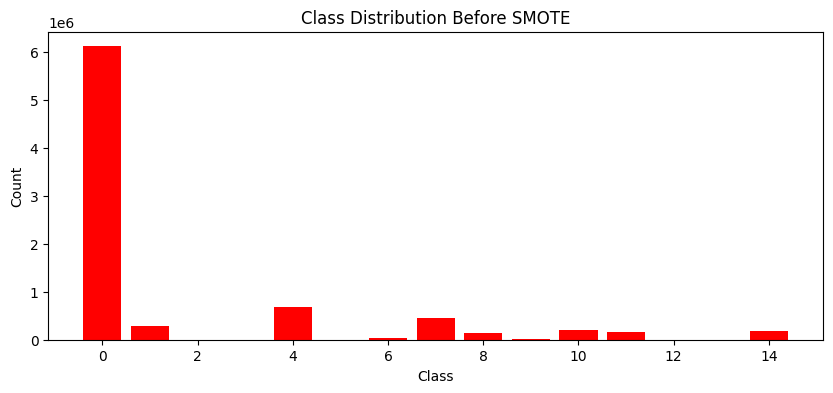

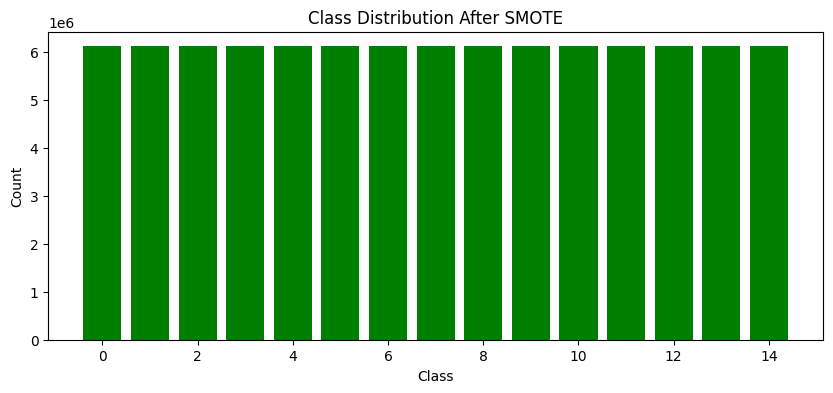

In [11]:
import matplotlib.pyplot as plt

# Before
plt.figure(figsize=(10,4))
plt.bar(Counter(y).keys(), Counter(y).values(), color='red')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# After
plt.figure(figsize=(10,4))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='green')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [12]:
from collections import Counter
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 6112151, 4: 686012, 7: 461912, 1: 286191, 10: 193360, 14: 187589, 11: 161934, 8: 139890, 6: 41508, 9: 10990, 5: 1730, 2: 611, 3: 230, 13: 87, 12: 59})
After SMOTE: Counter({0: 6112151, 14: 6112151, 10: 6112151, 6: 6112151, 9: 6112151, 7: 6112151, 8: 6112151, 4: 6112151, 5: 6112151, 3: 6112151, 13: 6112151, 2: 6112151, 11: 6112151, 1: 6112151, 12: 6112151})


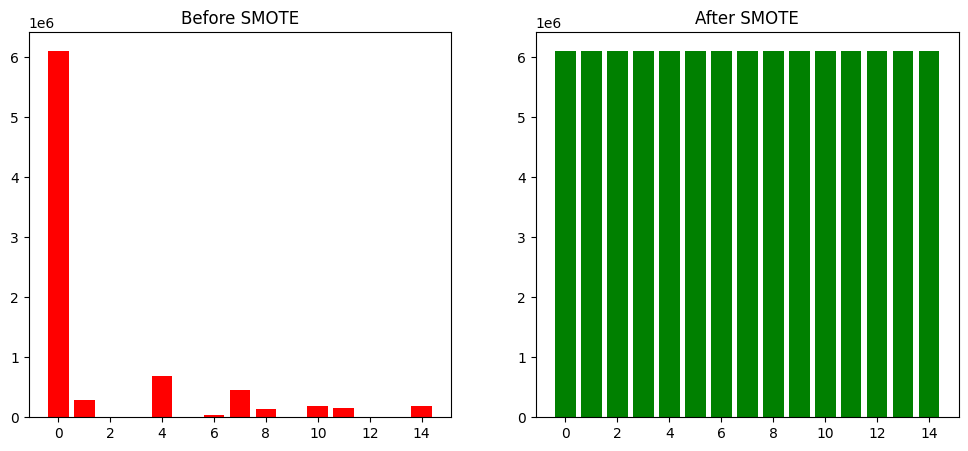

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].bar(Counter(y).keys(), Counter(y).values(), color='red')
ax[0].set_title("Before SMOTE")

ax[1].bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='green')
ax[1].set_title("After SMOTE")

plt.show()


In [14]:
counts_before = Counter(y)
counts_after = Counter(y_resampled)

minority = min(counts_before, key=counts_before.get)
growth = (counts_after[minority] - counts_before[minority]) / counts_before[minority] * 100
print(f"Minority class grew by {growth:.1f}% after SMOTE")



Minority class grew by 10359478.0% after SMOTE
